In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Running the program "OD_growth_finder.py" will analyze an entire plate, create and save plots for each sample, save the data summary file, and create and save summary plots for the experiment.
If you want to analyze your data in a more interactive way, you can do so via the ipython notebook.

In [2]:
import OD_growth_finder as od

There are many ways to use the functions in OD_growth_finder. To call specific functions, type od.function(inputs). See the readme file for a description of all of the functions and their input arguments.
Let's first get an overview of the experiment results.

In [3]:
demo_expt1 = od.analyze_experiment('./demo_files/demo_data.xlsx', 
                                   plate_layout='./demo_files/demo_layout.xlsx',
                                   blank='H7', out_dir = './demo_files/')

created experiment
input samples
analyzed samples
created output data file


That created an excel file of the results in the specified output directory. Since we specified a plate_layout file, this information is added to the results (this comes in handy later). Here is what that looks like (first ten rows only).

In [5]:
demo_expt1.results[:10]

,well,growth rate,doubling time,time of max growth rate,lag time,OD at end of lag,saturation time,OD at saturation,max OD,time of max OD,row,column,strain,media,replicate,expt_date,run
1,A1,0.010612,65.319993,50,NaN,NaN,260,0.833,0.918,900,1,1,003,YPD,1,2016-01-14,YPD+/-NaCl
2,A2,0.009803,70.707478,70,NaN,NaN,280,0.837,1.097,930,1,2,003,YPD,2,2016-01-14,YPD+/-NaCl
3,A3,0.010495,66.044618,50,NaN,NaN,270,0.845,0.926,880,1,3,003,YPD,3,2016-01-14,YPD+/-NaCl
4,A4,0.009213,75.234853,70,NaN,NaN,270,0.934,0.993,880,1,4,227B,YPD,1,2016-01-14,YPD+/-NaCl
5,A5,0.009814,70.629406,50,NaN,NaN,250,0.938,1.006,920,1,5,227B,YPD,2,2016-01-14,YPD+/-NaCl
6,A6,0.009513,72.859417,50,NaN,NaN,250,0.923,0.993,760,1,6,227B,YPD,3,2016-01-14,YPD+/-NaCl
7,A7,0.009326,74.326247,90,NaN,NaN,270,0.857,0.912,760,1,7,214A,YPD,1,2016-01-14,YPD+/-NaCl
8,A8,0.009571,72.421707,90,NaN,NaN,270,0.854,0.906,760,1,8,214A,YPD,2,2016-01-14,YPD+/-NaCl
9,A9,0.009375,73.935661,80,NaN,NaN,260,0.870,0.974,780,1,9,214A,YPD,3,2016-01-14,YPD+/-NaCl
10,A10,0.009402,73.726403,80,NaN,NaN,260,0.854,0.922,870,1,10,214B,YPD,1,2016-01-14,YPD+/-NaCl


Now let's see an overview of the results in two plots.

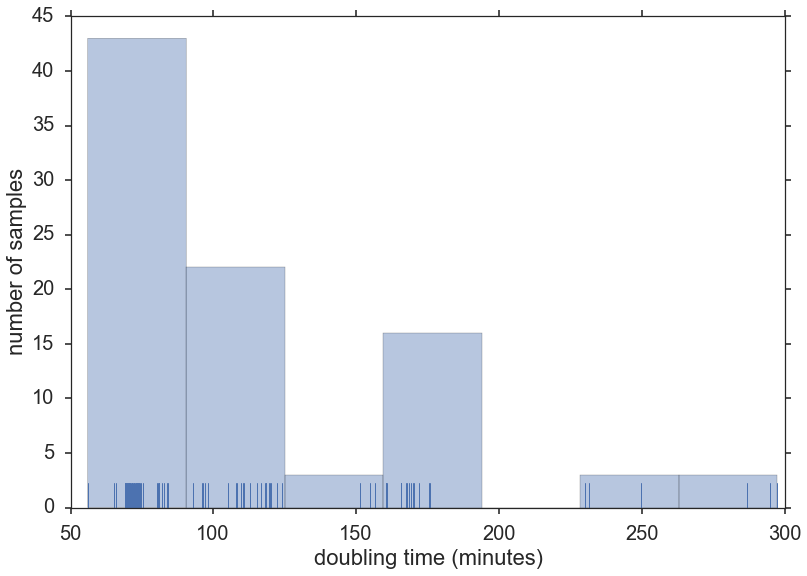

/Users/nmcollin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


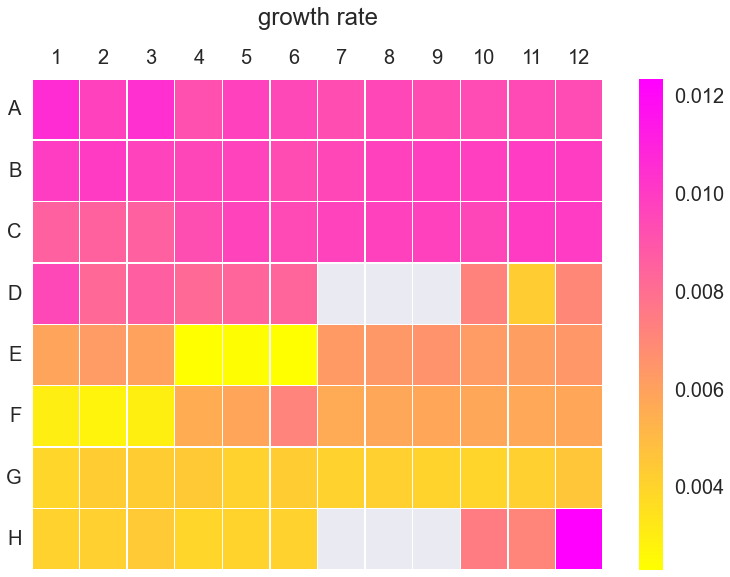

In [6]:
od.make_plots(demo_expt1)

This created a histogram showing the distribution of doubling times and a heatmap showing the growth rates (from which the doubling times are calculated).
We can actually plot any of the metrics on these plots. Here is a histogram of the growth rates. 

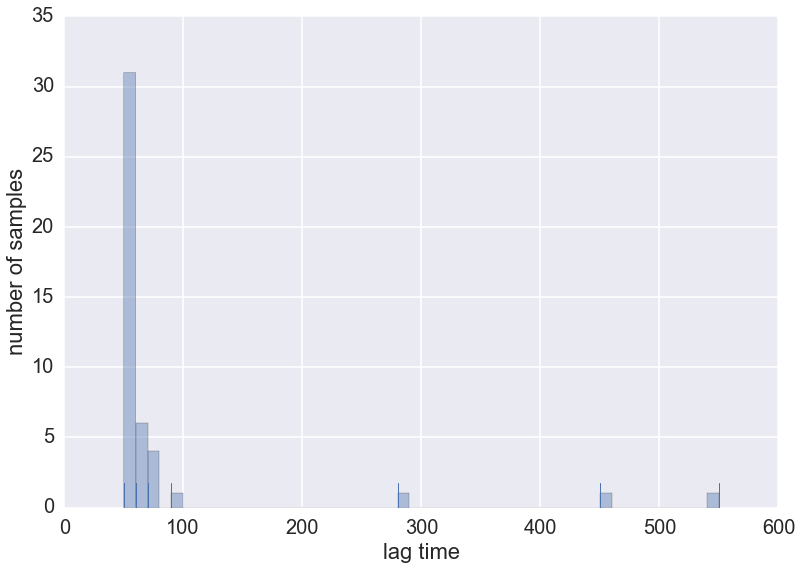

In [7]:
demo_expt1.plot_histogram(metric='lag time', unit='')

And here are heat maps of doubling time and lag time.

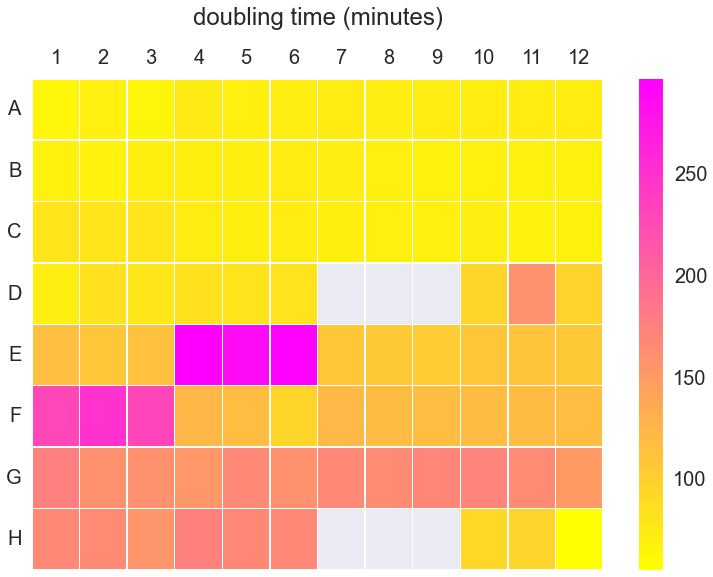

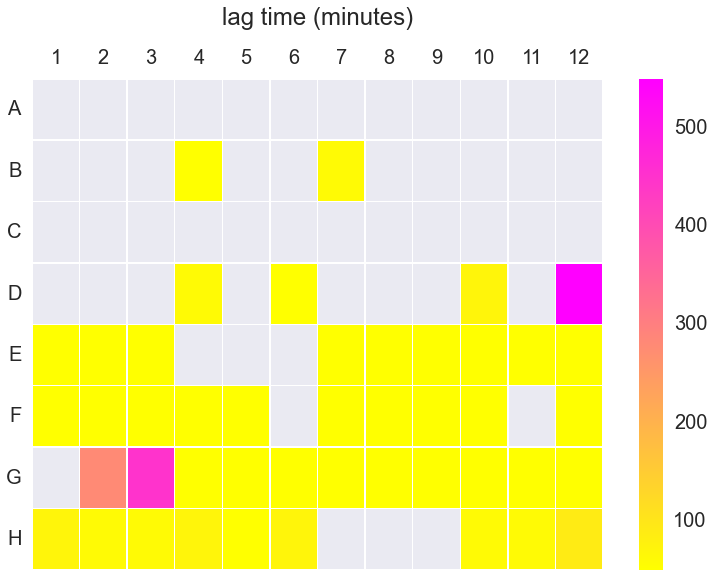

In [7]:
demo_expt1.plot_heatmap(metric='doubling time', unit='minutes')
demo_expt1.plot_heatmap(metric='lag time', unit='minutes')

Gray squares are those samples missing data. Many of the samples in this experiment had no detectable lag phase. 

Now let's see what a single sample's analysis looks like. We did not make sample plots in the first step (sample_plots=False is the default for analyze_experiment), so we have to make one now. We can get a sample's information using the well name.

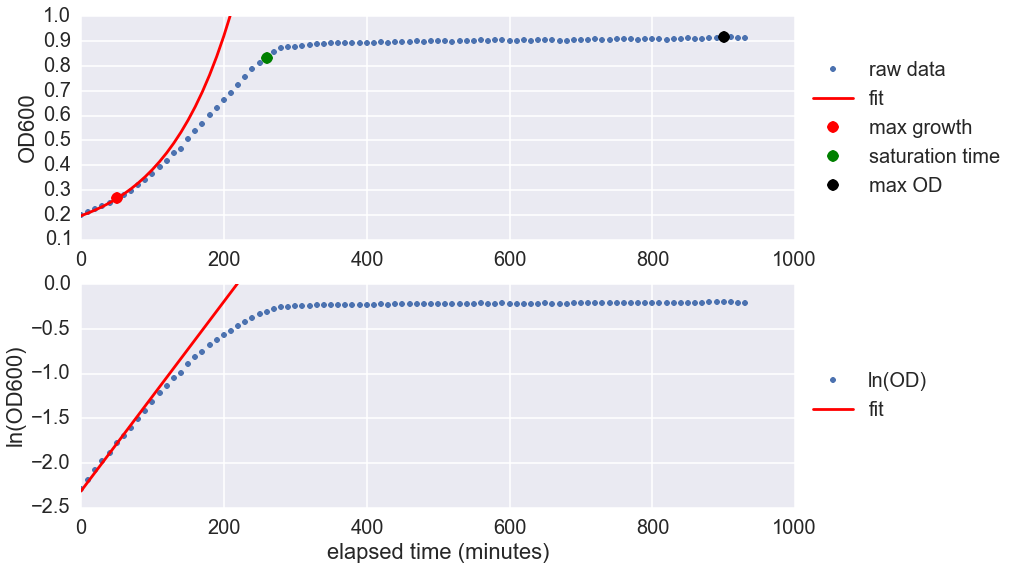

In [8]:
A1 = demo_expt1.samples['A1']
A1.plot_growth_parameters()

Here we have two plots. The upper plot is the original OD data (not adjusted by the blank value). The red line is the exponential curve that was fit to the ln(OD) data. This is seen as a straight line on the lower plot. The green point is the calculated time of saturation, and the black point is simply the maximum OD reached. This sample had no calculated lag time.

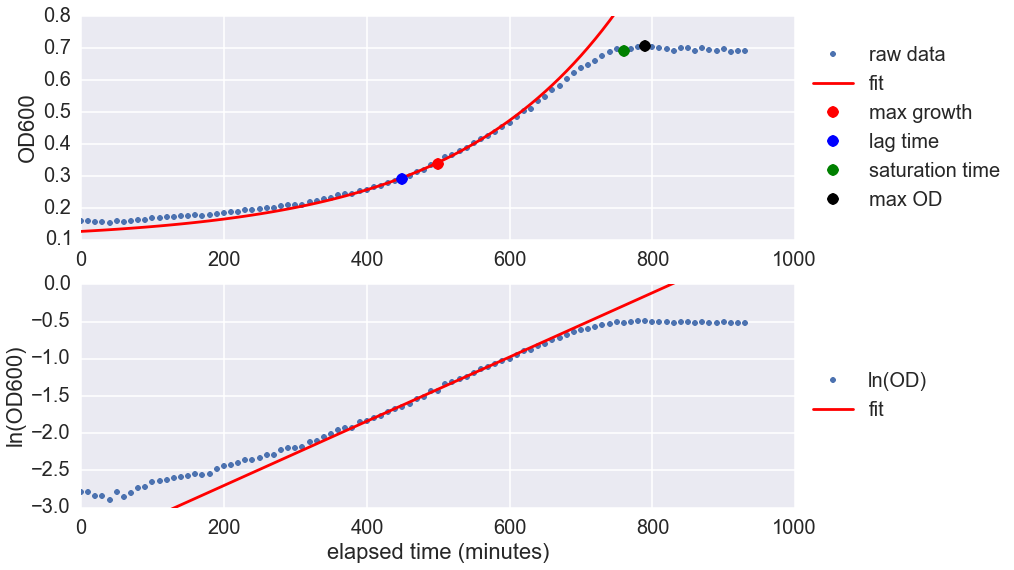

In [9]:
G3 = demo_expt1.samples['G3']
G3.plot_growth_parameters()

This is a much slower-growing sample. It looks like the lag time calculation could still use some work. But the saturation time calculation looks pretty good.

Since I have replicates in the experiment, I want to calculate averages, grouping my samples by key features. I am going to group my samples by "strain" and "media", two details I included in the plate_layout file.

In [10]:
od.compute_means(demo_expt1, metric=['growth rate'], keys=['strain','media'])

growth rate
strain media                  
003    0.5 M NaCl     0.006070
       YPD            0.010303
178A   0.5 M NaCl     0.002927
       YPD            0.009911
178B   0.5 M NaCl     0.006218
       YPD            0.009579
190A   0.5 M NaCl     0.004193
       YPD            0.008573
190B   0.5 M NaCl     0.004304
       YPD            0.009478
202A   0.5 M NaCl     0.005775
       YPD            0.009761
202B   0.5 M NaCl     0.005805
       YPD            0.009949
214A   0.5 M NaCl     0.006443
       YPD            0.009424
214B   0.5 M NaCl     0.006283
       YPD            0.009422
224A   0.5 M NaCl     0.004247
       YPD            0.008818
224B   0.5 M NaCl     0.004045
       YPD            0.008359
226A   0.5 M NaCl     0.004132
       YPD            0.009796
226C   0.5 M NaCl     0.004262
       YPD            0.009884
227B   0.5 M NaCl     0.002366
       YPD            0.009513
blank  0.5 M NaCl     0.008994
       YPD            0.006203

We can actually do this for many different metrics at the same time. If we include save=True, this saves the results to an excel file.

In [11]:
od.compute_means(demo_expt1, metric=['growth rate', 'doubling time', 'lag time', 
                                     'saturation time', 'max OD'], 
                 save=True, keys=['strain','media'])

doubling time  growth rate    lag time    max OD  \
strain media                                                          
003    0.5 M NaCl     114.249859     0.006070   50.000000  0.926333   
       YPD             67.357363     0.010303         NaN  0.980333   
178A   0.5 M NaCl     237.098547     0.002927   50.000000  0.692667   
       YPD             69.950184     0.009911         NaN  0.992000   
178B   0.5 M NaCl     112.790403     0.006218   50.000000  0.944000   
       YPD             72.375100     0.009579   50.000000  0.973667   
190A   0.5 M NaCl     165.609861     0.004193  365.000000  0.728000   
       YPD             80.852844     0.008573         NaN  0.899333   
190B   0.5 M NaCl     161.237439     0.004304   50.000000  0.812333   
       YPD             73.155704     0.009478         NaN  0.974333   
202A   0.5 M NaCl     120.053299     0.005775   50.000000  0.991333   
       YPD             71.025055     0.009761   60.000000  0.992667   
202B   0.5 M NaCl     119.412762     0.005805   50.000000  1.008333   
       YPD             69.668528     0.009949         NaN  0.975333   
214A   0.5 M NaCl     107.616311     0.006443   50.000000  0.873333   
       YPD             73.561205     0.009424         NaN  0.930667   
214B   0.5 M NaCl     110.356137     0.006283   50.000000  0.862333   
       YPD             73.570548     0.009422         NaN  0.917333   
224A   0.5 M NaCl     163.367573     0.004247   63.333333  0.865667   
       YPD             78.864071     0.008818         NaN  1.102667   
224B   0.5 M NaCl     171.422225     0.004045   63.333333  0.847667   
       YPD             82.934485     0.008359   55.000000  1.053000   
226A   0.5 M NaCl     167.786245     0.004132   50.000000  0.827667   
       YPD             70.756733     0.009796         NaN  0.940000   
226C   0.5 M NaCl     163.093354     0.004262   50.000000  0.812667   
       YPD             70.158564     0.009884         NaN  0.923667   
227B   0.5 M NaCl     293.014264     0.002366         NaN  0.572333   
       YPD             72.907892     0.009513         NaN  0.997333   
blank  0.5 M NaCl      81.981282     0.008994   70.000000  0.101000   
       YPD            118.125345     0.006203  310.000000  0.103000   

                   saturation time  
strain media                        
003    0.5 M NaCl       393.333333  
       YPD              270.000000  
178A   0.5 M NaCl       613.333333  
       YPD              260.000000  
178B   0.5 M NaCl       373.333333  
       YPD              283.333333  
190A   0.5 M NaCl       670.000000  
       YPD              363.333333  
190B   0.5 M NaCl       393.333333  
       YPD              233.333333  
202A   0.5 M NaCl       393.333333  
       YPD              270.000000  
202B   0.5 M NaCl       396.666667  
       YPD              256.666667  
214A   0.5 M NaCl       353.333333  
       YPD              266.666667  
214B   0.5 M NaCl       350.000000  
       YPD              256.666667  
224A   0.5 M NaCl       493.333333  
       YPD              263.333333  
224B   0.5 M NaCl       476.666667  
       YPD              260.000000  
226A   0.5 M NaCl       370.000000  
       YPD              223.333333  
226C   0.5 M NaCl       386.666667  
       YPD              230.000000  
227B   0.5 M NaCl       836.666667  
       YPD              256.666667  
blank  0.5 M NaCl              NaN  
       YPD              480.000000